### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지 import
import statsmodels.api as sm # 안쓸껄??
import sklearn as sk

#### Fashion MNIST 다운로드

28 * 28 크기의 패션과 관련된 10개 종류의 데이터

- 0 티셔츠/탑
- 1 바지
- 2 풀오버(스웨터의 일종)
- 3 드레스
- 4 코트
- 5 샌들
- 6 셔츠
- 7 스니커즈
- 8 가방
- 9 앵클 부츠 

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import (Dense, BatchNormalization, Dropout)

In [5]:
from keras.datasets.fashion_mnist import load_data

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
print((train_images.shape, train_labels.shape))

((60000, 28, 28), (60000,))


In [8]:
print((test_images.shape, test_labels.shape))

((10000, 28, 28), (10000,))


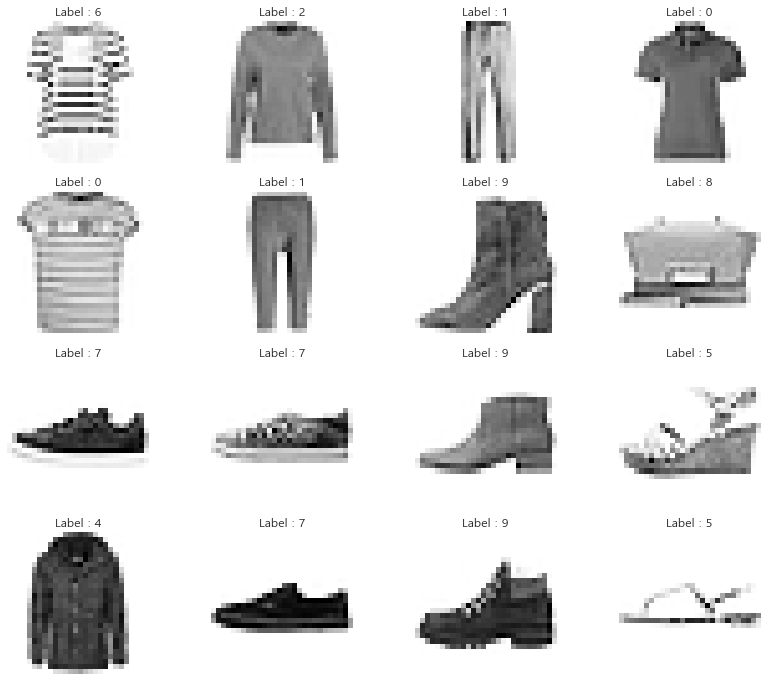

In [10]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, len(train_labels)), k=16)
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(train_images[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label : ' + str(train_labels[n]))
    plt.axis('off')
    
plt.show()

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                 epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 4s 7ms/step - loss: 9.0628 - accuracy: 0.7780 - val_loss: 0.9719 - val_accuracy: 0.7935
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.5900 - accuracy: 0.8218 - val_loss: 0.5331 - val_accuracy: 0.8259
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.4206 - accuracy: 0.8522 - val_loss: 0.4786 - val_accuracy: 0.8436
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.3838 - accuracy: 0.8607 - val_loss: 0.4780 - val_accuracy: 0.8432
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.3727 - accuracy: 0.8645 - val_loss: 0.4621 - val_accuracy: 0.8423
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.3717 - accuracy: 0.8659 - val_loss: 0.4934 - val_accuracy: 0.8366
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - loss: 0.3768 - accuracy: 0.8653 - val_loss: 0.4797 - val_accuracy: 0.8396
Epoch 

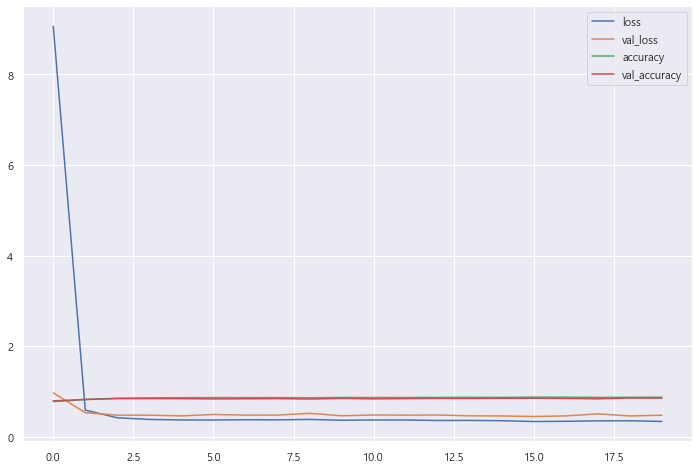

In [14]:
# Accuracy / Lossfunction 값
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.show()

In [15]:
score = model.evaluate(test_images, test_labels)
print('Test loss : ', score[0])
print('Test Accuracy : ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.8541
Test loss :  0.4775410592556
Test Accuracy :  0.8540999889373779


In [16]:
import numpy as np

predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10], test_labels[:10]

313/313 [==============================] - 1s 2ms/step


(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

In [17]:
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
len(wrong_result)

1459

In [18]:
import random

samples = random.choices(population= wrong_result, k = 16)
samples

[7369,
 2417,
 406,
 7288,
 1294,
 3236,
 2939,
 67,
 9276,
 9062,
 5065,
 9784,
 1284,
 7095,
 1671,
 4742]

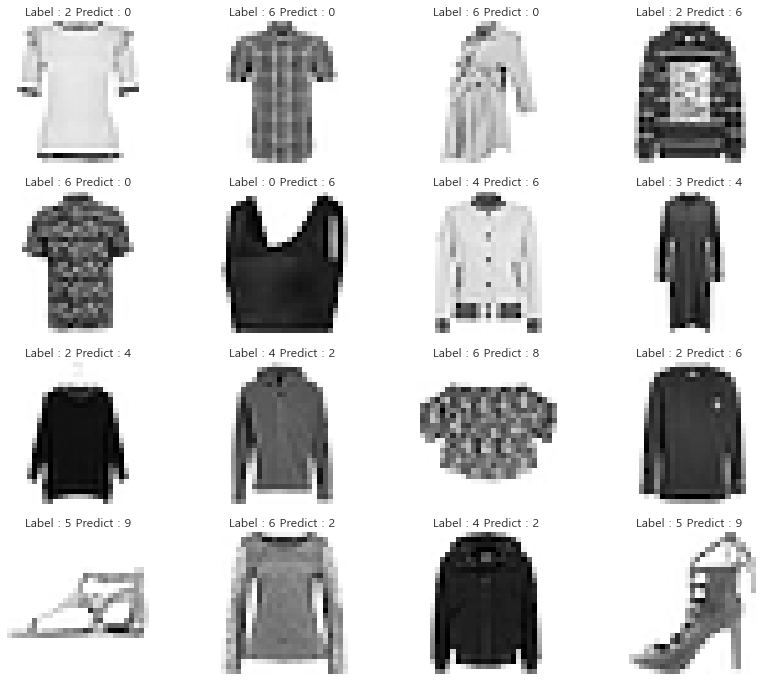

In [19]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(test_images[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label : ' + str(test_labels[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()